This Python script analyzes a text corpus to identify and visualize ideological stances on a spectrum ranging from Pro-Israeli to Pro-Palestinian. The process involves the following steps:

Load and Vectorize Text Data:

Reads a corpus of text documents from a file.
Uses TF-IDF (Term Frequency-Inverse Document Frequency) to convert the text data into numerical features.
Latent Semantic Analysis (LSA):

Applies LSA to reduce the dimensionality of the TF-IDF matrix and extract topics. This results in a matrix where each document is represented in a lower-dimensional topic space.
Ideological Scoring:

Defines a set of ideological tags and assigns numerical scores to these tags based on their stance.
Calculates ideological scores for each document by projecting the reduced topic vectors onto the ideological tags.
Normalization and Visualization:

Normalizes the ideological scores to prepare for visualization.
Plots a scatter plot to visualize each document’s alignment on the Pro-Israeli to Pro-Palestinian spectrum, with documents positioned based on their calculated ideological scores.
The final plot provides a visual representation of how each document aligns with the ideological dimension, helping to understand the distribution of views within the corpus.



In [17]:
pip install numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


Import Libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize

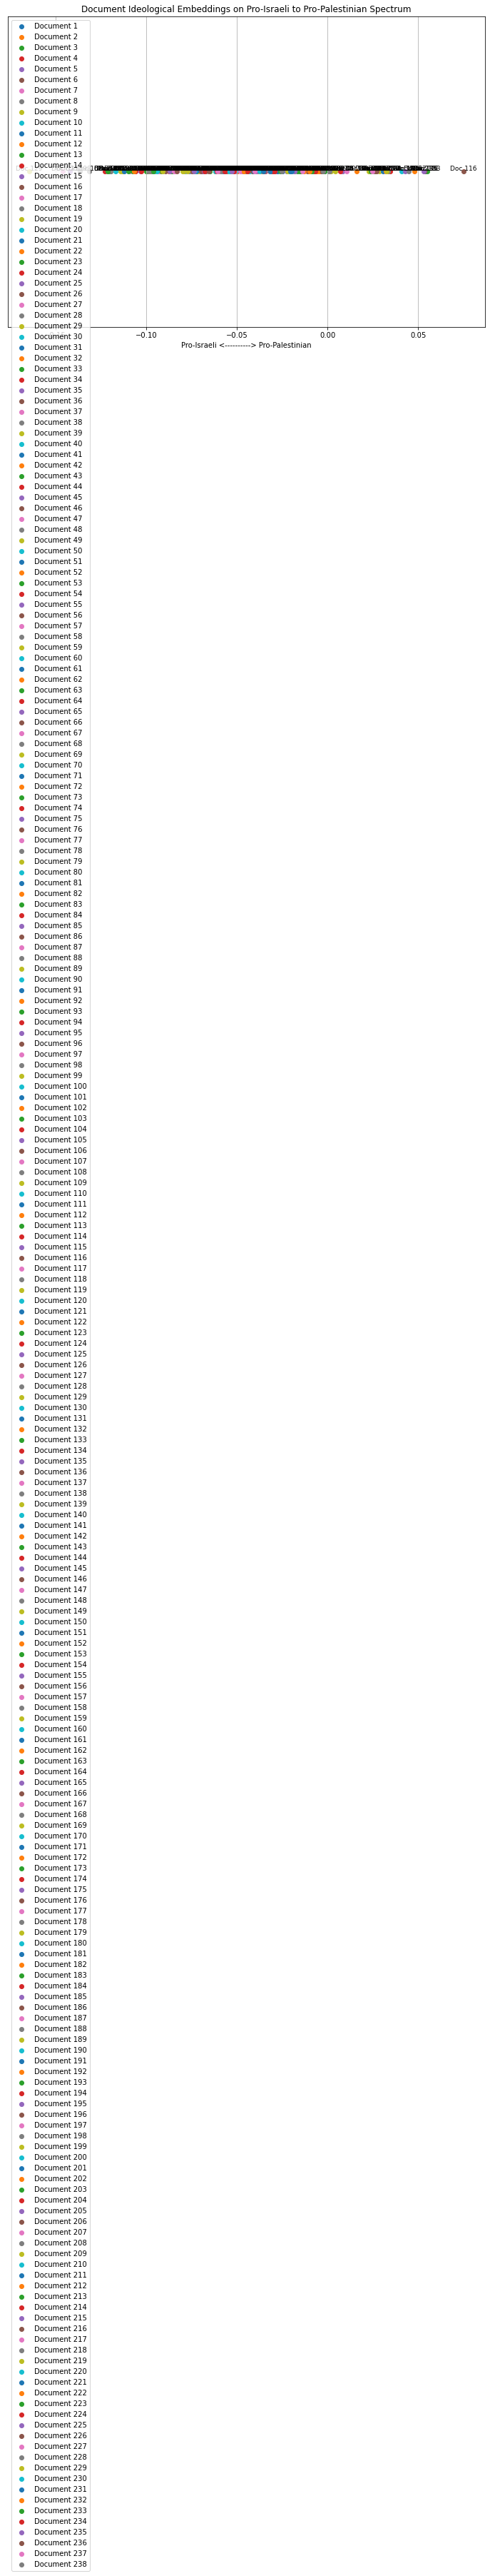

In [52]:
# Load the corpus from the file
with open("transcript.txt", "r") as f:
    corpus = f.readlines()

# Vectorize the corpus using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)

# Number of topics to identify
K = 4

# Perform LSA for dimensionality reduction and topic modeling
lsa = TruncatedSVD(n_components=K, random_state=0)
X_topics = lsa.fit_transform(X)

# Define ideological tags and their corresponding scores
ideological_tags = ["Pro-Israeli", "Neutral or Balanced Perspective", "Pro-Palestinian", "International Diplomacy and Opinions"]
ideological_scores = {
    "Pro-Israeli": -1,
    "Neutral or Balanced Perspective": 0,
    "Pro-Palestinian": 1,
    "International Diplomacy and Opinions": 0.5
}

# Ensure the number of tags matches the number of topics
if len(ideological_tags) != len(lsa.components_):
    raise ValueError("Number of ideological tags must match the number of topics.")

# Assign scores to topics based on the tags
topic_scores = [ideological_scores[tag] for tag in ideological_tags]

# Compute scores for each document based on topics
phi_scores = np.dot(X_topics, np.array(topic_scores))

# Normalize phi scores for visualization
phi_normalized = normalize(phi_scores[:, np.newaxis], axis=0)

# Visualize the ideological embeddings
plt.figure(figsize=(12, 8))

# Scatter plot based on the Pro-Israeli to Pro-Palestinian dimension
for i, user_embedding in enumerate(phi_normalized):
    plt.scatter(user_embedding[0], 0, label=f'Document {i + 1}')  # Use 0 for y-axis to plot on a single line
    plt.text(user_embedding[0], 0, f'Doc {i + 1}', fontsize=9, ha='center', va='bottom')

# Set labels and titles to reflect the ideological spectrum
plt.xlabel('Pro-Israeli <----------> Pro-Palestinian')
plt.yticks([])  # Remove y-axis ticks since we are focusing on the x-axis dimension
plt.title('Document Ideological Embeddings on Pro-Israeli to Pro-Palestinian Spectrum')
plt.legend()
plt.grid(True)
plt.show()
